# 30903_김지우_0927_4

In [1]:
import pandas as pd
import numpy as np

In [2]:
exam = pd.read_csv('exam.csv')
exam.head()

id  nclass  math  english  science
0   1       1    50       98       50
1   2       1    60       97       60
2   3       1    45       86       78
3   4       1    30       98       58
4   5       2    25       80       65

In [3]:
# 2, 7, 14행 수학 NaN 할당
exam.loc[[2,7,14],['math']] = np.nan
exam

id  nclass  math  english  science
0    1       1  50.0       98       50
1    2       1  60.0       97       60
2    3       1   NaN       86       78
3    4       1  30.0       98       58
4    5       2  25.0       80       65
5    6       2  50.0       89       98
6    7       2  80.0       90       45
7    8       2   NaN       78       25
8    9       3  20.0       98       15
9   10       3  50.0       98       45
10  11       3  65.0       65       65
11  12       3  45.0       85       32
12  13       4  46.0       98       65
13  14       4  48.0       87       12
14  15       4   NaN       56       78
15  16       4  58.0       98       65
16  17       5  65.0       68       98
17  18       5  80.0       78       90
18  19       5  89.0       68       87
19  20       5  78.0       83       58

In [4]:
# math의 평균
exam['math'].mean()

55.23529411764706

In [5]:
# 평균은 NaN애 값으로 대체
exam['math'] = exam['math'].fillna(55)
exam

id  nclass  math  english  science
0    1       1  50.0       98       50
1    2       1  60.0       97       60
2    3       1  55.0       86       78
3    4       1  30.0       98       58
4    5       2  25.0       80       65
5    6       2  50.0       89       98
6    7       2  80.0       90       45
7    8       2  55.0       78       25
8    9       3  20.0       98       15
9   10       3  50.0       98       45
10  11       3  65.0       65       65
11  12       3  45.0       85       32
12  13       4  46.0       98       65
13  14       4  48.0       87       12
14  15       4  55.0       56       78
15  16       4  58.0       98       65
16  17       5  65.0       68       98
17  18       5  80.0       78       90
18  19       5  89.0       68       87
19  20       5  78.0       83       58

In [6]:
df = pd.DataFrame({'sex' : [1,2,1,8,2,1],
                  'score' : [5,4,3,4,2,6]})
df

sex  score
0    1      5
1    2      4
2    1      3
3    8      4
4    2      2
5    1      6

In [7]:
# 이상 데이터 확인
df['sex'].value_counts(sort=False).sort_index()

1    3
2    2
8    1
Name: sex, dtype: int64

In [8]:
# 점수열을 카운트하기
df['score'].value_counts(sort=False).sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [9]:
# sex이 8이면 NaN부여 그렇지 않으면 자기자신 np.where
df['sex'] = np.where(df['sex'] == 8, np.nan, df['sex'])
df

sex  score
0  1.0      5
1  2.0      4
2  1.0      3
3  NaN      4
4  2.0      2
5  1.0      6

In [10]:
# score가 5보다 크면 NaN부여
df['score'] = np.where(df['score']>5, np.nan, df['score'])
df

sex  score
0  1.0    5.0
1  2.0    4.0
2  1.0    3.0
3  NaN    4.0
4  2.0    2.0
5  1.0    NaN

In [11]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기

df.dropna(subset = ['sex','score'])\
    .groupby('sex')\
    .agg(mean_score = ('score','mean'))

mean_score
sex            
1.0         4.0
2.0         3.0

In [12]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl category
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

<AxesSubplot:ylabel='hwy'>

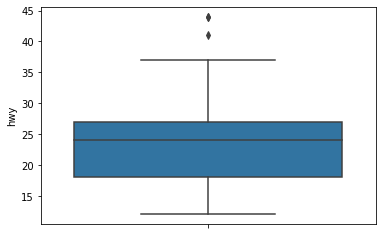

In [13]:
import seaborn as sns
sns.boxplot(data = mpg, y='hwy')
# 극단적인 값

In [14]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [15]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [16]:
# IQR구하기
# iqr pct75 - pct25
iqr = pct75 - pct25
iqr

9.0

In [17]:
# 하한선, 상한선 구하기
# 하한선 pct25 - 1.5*iqr
pct25 - 1.5*iqr

4.5

In [18]:
# 상한선 pct25 + 1.5*iqr
pct75 + 1.5*iqr

40.5

In [19]:
# 극단치를 NaN 할당 처리하기
# 4.5 ~ 40.5 벗어나면 NaN부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy']) 

# NaN 빈도 확인
mpg['hwy'].isna().sum()

3

In [20]:
# hwy NaN제거
# drv 분류
# hwy 평균 구하기

mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

mean_hwy
drv           
4    19.174757
f    27.728155
r    21.000000

## 정리
```
## 1. 결측치 정제하기
pd.isna(df).sum()                                 # 결측치 확인
df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거

## 2. 이상치 정제하기
# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
pct25 - 1.5 * iqr                 # 하한
pct75 + 1.5 * iqr                 # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])
```

In [24]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl category
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

<AxesSubplot:xlabel='displ', ylabel='hwy'>

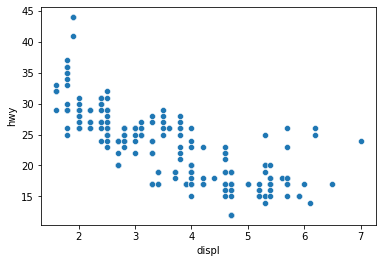

In [25]:
# x축 배기량 displ y 축 hwy를 나타내는 산점도(scatterplot)

# seaborn
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

[(3.0, 6.0)]

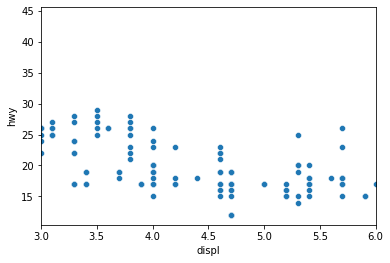

In [26]:
# 축 범위 설정하기
# x축 범위 3-6으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
    .set(xlim = [3,6])

[(3.0, 6.0), (10.0, 30.0)]

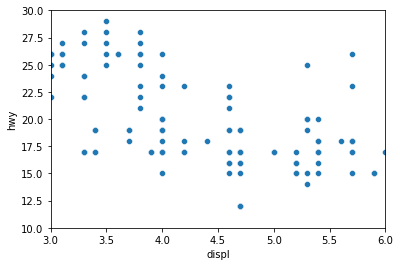

In [27]:
# x축 범위 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
    .set(xlim = [3,6], ylim = [10,30])

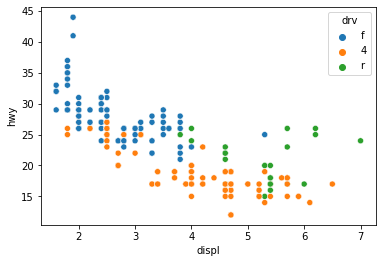

In [28]:
# 종류별로 표식 색깔 바꾸기
# drv별로 표식 색깔 구분해 보기
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv');

In [29]:
# 평균 막대 그래프 만들기
# 집단별 평균표 만들기
# drv별
df_mpg = mpg.groupby('drv')\
            .agg(mean_hwy = ('hwy','mean'))
df_mpg

mean_hwy
drv           
4    19.174757
f    28.160377
r    21.000000

In [30]:
# drv별 분리
# hwy평균 구하기
df_mpg = mpg.groupby('drv', as_index = False)\
            .agg(mean_hwy = ('hwy','mean'))
df_mpg

drv   mean_hwy
0   4  19.174757
1   f  28.160377
2   r  21.000000

<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

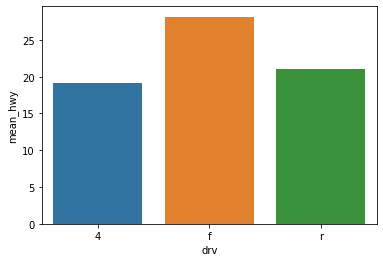

In [31]:
# 막대 그래프 그리기
sns.barplot(data = df_mpg, x = 'drv' , y = 'mean_hwy')

<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

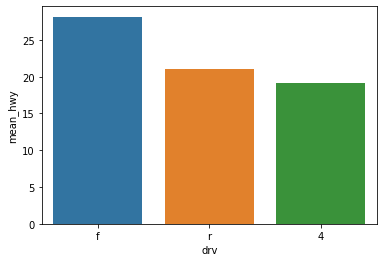

In [32]:
# 크기순으로 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)

# 막대 그래프 그리기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

In [33]:
# 집단별 groupby
# 빈도표 count
df_mpg = mpg.groupby('drv', as_index = False)\
            .agg(n = ('drv', 'count'))
df_mpg

drv    n
0   4  103
1   f  106
2   r   25

<AxesSubplot:xlabel='drv', ylabel='n'>

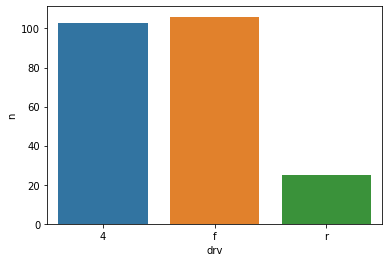

In [34]:
# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

<AxesSubplot:xlabel='drv', ylabel='count'>

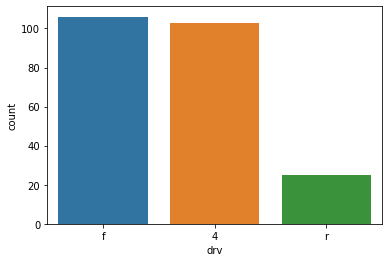

In [35]:
sns.countplot(data = mpg, x = 'drv')